# Logistic regression

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.DataFrame(pd.read_csv('insurance_data.csv'))
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,test_size=0.1,random_state=42)

In [5]:
X_test

,age
8,62
13,29
9,61


In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
model=LogisticRegression()

In [8]:
model.fit(X_train,y_train)

LogisticRegression()

In [9]:
model.predict(X_test)

array([1, 0, 1], dtype=int64)

In [10]:
model.score(X_test,y_test)

1.0

In [11]:
y_pred=model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Evaluate the model

In [13]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:',conf_matrix)
print('Classification Report:-')
print(class_report)

Accuracy: 1.0
Confusion Matrix: [[1 0]
 [0 2]]
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [14]:
model.predict([[15]])

D:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

#### Plotting the logistic function (sigmoid curve)

D:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


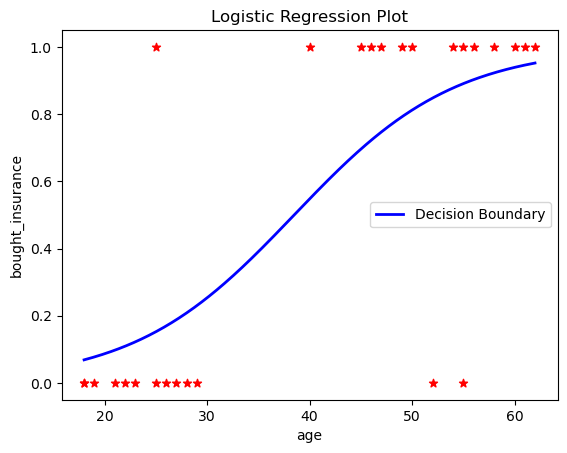

In [15]:
#plotting scatter points
plt.xlabel('age')
plt.ylabel('bought_insurance')
plt.title('Logistic Regression Plot')
plt.scatter(df.age,df.bought_insurance,color='red',marker='*')
#### Plotting decision boundry
age_range = np.linspace(df['age'].min(), df['age'].max(), 300).reshape(-1, 1)
probabilities = model.predict_proba(age_range)[:, 1]
plt.plot(age_range, probabilities, color='blue', linewidth=2, label='Decision Boundary')
plt.legend()
plt.show()